# Программирование на Python, БИ

## НИУ ВШЭ, 2025-26 учебный год

## Проект №2. DE: Scraping & API

**Тема проекта**: Анализ российского фондового рынка с целью ознакомления населения с инструментами для инвестиций.

Сейчас ключевая ставка постепенно снижается, и люди начинают доставать свои деньги с депозитов, с целью переложить их в более доходные инструменты. Наша работа направлена на то, чтобы человек, который никогда не соприкасался с фондовым рынком мог узнать про разные виды активов и выбрать оптимальную для себя стратегию инвестирования.

In [ ]:
import requests
from bs4 import BeautifulSoup
from time import sleep
import pandas as pd
import json
import pandas as pd
import numpy as np
from datetime import datetime

# Сбор данных

Для анализа рынка обратимся к индексам различных инструментов представленных на Мосбирже. Данные индексы помогут нам проанализировать характер поведения каждого типа активов.

Напишем единую функцию для сбора данных с Мосбирже, которая позволить вытаскивать материалы по ссылке с ресурса.




In [ ]:
def moex_data_history(url):
    headers = {"User-Agent": "Mozilla/5.0"}
    all_data = []
    start = 0

    while True:
        full_url = f"{url}&start={start}"
        r = requests.get(full_url, headers=headers)

        text = r.text.replace("JSON_CALLBACK(", "").strip().rstrip(")")
        j = json.loads(text)

        candles = j[1]["candles"]
        if not candles:
            break

        all_data += candles
        start += len(candles)

    return pd.DataFrame(all_data)


# Перейдем к сбору индексов

In [ ]:
# 1 - Индекс государственных облигаций (RGBITR - индекс гособлигаций)
inp_1 = "https://iss.moex.com/iss/engines/stock/markets/index/boards/RGBI/securities/RGBITR/candles.jsonp?interval=24&iss.reverse=true&from=2015-11-07&till=2025-11-10&limit=10000&sort_order=TRADEDATE&sort_order_desc=desc&iss.meta=off&iss.json=extended&callback=JSON_CALLBACK&lang=ru&start=0"  # например: https://iss.moex.com/iss/engines/stock/markets/index/boards/RGBI/securities/RGBITR/candles.jsonp?interval=24&iss.reverse=true&from=2015-11-07&till=2025-11-10&limit=10000&sort_order=TRADEDATE&sort_order_desc=desc&iss.meta=off&iss.json=extended&callback=JSON_CALLBACK&lang=ru&start=0

RGBITR = moex_data_history(inp_1)
RGBITR["index_name"] = "RGBITR"

 Индекс Государственных облигаций Московской Биржи - основной индикатор рынка российского государственного долга. Он включает наиболее ликвидные Облигации федерального займа с дюрацией более одного года, рассчитывается в режиме реального времени по методам совокупного дохода и чистых цен.

In [ ]:
# 2 - Индекс акций средней и малой капитализации (MCXSM)
inp_4 = "https://iss.moex.com/iss/engines/stock/markets/index/boards/MCXSM/securities/MCXSM/candles.jsonp?interval=24&iss.reverse=true&from=2015-01-01&till=2025-11-10&limit=10000&sort_order=TRADEDATE&sort_order_desc=desc&iss.meta=off&iss.json=extended&callback=JSON_CALLBACK&lang=ru&start=0"  # например https://iss.moex.com/iss/engines/stock/markets/index/boards/MCXSM/securities/MCXSM/candles.jsonp?interval=24&iss.reverse=true&from=2015-01-01&till=2025-11-10&limit=10000&sort_order=TRADEDATE&sort_order_desc=desc&iss.meta=off&iss.json=extended&callback=JSON_CALLBACK&lang=ru&start=0

MCXSM = moex_data_history(inp_4)
MCXSM["index_name"] = "MCXSM"


Индекс средней и малой капитализации Московской Биржи - ценовой, взвешенный по рыночной капитализации с учетом free-float композитный индекс российского фондового рынка, в состав которого входят ликвидные акции среднего и малого уровня капитализации.

In [ ]:
# 3 - Фонд MCFTR - индекс полной доходности Московской биржи («брутто»)
#https://iss.moex.com/iss/engines/stock/markets/index/securities/MOEXRE/candles.jsonp?interval=24&iss.reverse=true&from=2020-03-20&till=2025-11-10&limit=10000&sort_order=TRADEDATE&sort_order_desc=desc&iss.meta=off&iss.json=extended&callback=JSON_CALLBACK&lang=ru

inp_8 = "https://iss.moex.com/iss/engines/stock/markets/index/securities/MOEXRE/candles.jsonp?interval=24&iss.reverse=true&from=2020-03-20&till=2025-11-10&limit=10000&sort_order=TRADEDATE&sort_order_desc=desc&iss.meta=off&iss.json=extended&callback=JSON_CALLBACK&lang=ru"
MCFTR = moex_data_history(inp_8)
MCFTR["index_name"] = "MCFTR"
MCFTR

,open,close,high,low,value,volume,begin,end,index_name
0,4895.86,4796.51,4895.86,4778.56,1779096332,0,2025-11-10 00:00:00,2025-11-10 19:01:13,MCFTR
1,4775.30,4826.57,4848.05,4775.30,1923419773,0,2025-11-07 00:00:00,2025-11-07 19:01:13,MCFTR
2,4833.42,4743.83,4834.03,4733.54,2273583074,0,2025-11-06 00:00:00,2025-11-06 19:01:12,MCFTR
3,4701.14,4751.87,4835.52,4682.51,2781624798,0,2025-11-05 00:00:00,2025-11-05 19:01:13,MCFTR
4,4740.25,4734.68,4763.52,4712.16,1099763076,0,2025-11-03 00:00:00,2025-11-03 19:01:12,MCFTR
...,...,...,...,...,...,...,...,...,...
1406,5409.45,5409.45,5409.45,5409.45,0,0,2020-03-26 00:00:00,2020-03-26 23:59:59,MCFTR
1407,5411.59,5411.59,5411.59,5411.59,0,0,2020-03-25 00:00:00,2020-03-25 23:59:59,MCFTR
1408,5353.30,5353.30,5353.30,5353.30,0,0,2020-03-24 00:00:00,2020-03-24 23:59:59,MCFTR
1409,5020.25,5020.25,5020.25,5020.25,0,0,2020-03-23 00:00:00,2020-03-23 23:59:59,MCFTR


Индексы полной доходности рассчитываются в дополнение к ценовым индексам и отражают изменение суммарной стоимости российских акций с учетом дивидендных выплат.

Биржа рассчитывает индексы полной доходности "брутто" – без учета налогообложения и "нетто" – с учетом налогообложения, по ставкам, применяемым к российским и иностранным организациям по той же Базе расчета, что и исходный ценовой индекс.


In [ ]:
# 4 - Фонд RUEYBCSTR - Индекс МосБиржи Облигаций повышенной доходности совокупный доход
#https://iss.moex.com/iss/engines/stock/markets/index/securities/RUEYBCSTR/candles.jsonp?interval=24&iss.reverse=true&from=2019-12-30&till=2025-11-10&limit=10000&sort_order=TRADEDATE&sort_order_desc=desc&iss.meta=off&iss.json=extended&callback=JSON_CALLBACK&lang=ru


inp_8 = "https://iss.moex.com/iss/engines/stock/markets/index/securities/RUEYBCSTR/candles.jsonp?interval=24&iss.reverse=true&from=2019-12-30&till=2025-11-10&limit=10000&sort_order=TRADEDATE&sort_order_desc=desc&iss.meta=off&iss.json=extended&callback=JSON_CALLBACK&lang=ru"
RUEYBCSTR = moex_data_history(inp_8)
RUEYBCSTR["index_name"] = "RUEYBCSTR"

Индекс Мосбиржи Облигаций повышенной доходности - кастомизированный индикатор рынка корпоративных облигаций с рейтингом не менее BBB(RU), но не более A+(RU) по национальной рейтинговой шкале или без рейтинга. В базу расчета индекса допускается включение облигаций из Сектора повышенного инвестиционного риска. Индекс рассчитывается методами совокупного дохода и чистых цен.

In [ ]:
# 5 - Фонд RGBI - Индекс Мосбиржи государственных облигаций ценовой
#https://iss.moex.com/iss/engines/stock/markets/index/securities/RGBI/candles.jsonp?interval=24&iss.reverse=true&from=2015-11-01&till=2025-11-11&limit=10000&sort_order=TRADEDATE&sort_order_desc=desc&iss.meta=off&iss.json=extended&callback=JSON_CALLBACK&lang=ru

inp_8 = "https://iss.moex.com/iss/engines/stock/markets/index/securities/RGBI/candles.jsonp?interval=24&iss.reverse=true&from=2015-11-01&till=2025-11-11&limit=10000&sort_order=TRADEDATE&sort_order_desc=desc&iss.meta=off&iss.json=extended&callback=JSON_CALLBACK&lang=ru"
RGBI = moex_data_history(inp_8)
RGBI["index_name"] = "RGBI"


Индекс Государственных облигаций Московской Биржи - основной индикатор рынка российского государственного долга. Он включает наиболее ликвидные Облигации федерального займа с дюрацией более одного года, рассчитывается в режиме реального времени по методам совокупного дохода и чистых цен.


In [ ]:
# 6 - Фонд MRSV - Вектор устойчивого развития
#https://iss.moex.com/iss/engines/stock/markets/index/securities/MRSV/candles.jsonp?interval=24&iss.reverse=true&from=2015-11-01&till=2025-11-10&limit=10000&sort_order=TRADEDATE&sort_order_desc=desc&iss.meta=off&iss.json=extended&callback=JSON_CALLBACK&lang=ru




inp_8 = "https://iss.moex.com/iss/engines/stock/markets/index/securities/MRSV/candles.jsonp?interval=24&iss.reverse=true&from=2015-11-01&till=2025-11-10&limit=10000&sort_order=TRADEDATE&sort_order_desc=desc&iss.meta=off&iss.json=extended&callback=JSON_CALLBACK&lang=ru"
MRSV = moex_data_history(inp_8)
MRSV["index_name"] = "MRSV"

Индекс ESG, в базу расчета которого входят акции компаний, показавших лучшую динамику показателей в сфере устойчивого развития и корпоративной социальной ответственности. Индекс отмечен премией UNCTAD ISAR HONOURS-2019.

In [ ]:
# 7 - Фонд MRBCTR- Индекс МосБиржи полной доходности 15
#https://iss.moex.com/iss/engines/stock/markets/index/securities/MRBCTR/candles.jsonp?interval=24&iss.reverse=true&from=2017-12-29&till=2025-11-10&limit=10000&sort_order=TRADEDATE&sort_order_desc=desc&iss.meta=off&iss.json=extended&callback=JSON_CALLBACK&lang=ru



inp_8 = "https://iss.moex.com/iss/engines/stock/markets/index/securities/MRBCTR/candles.jsonp?interval=24&iss.reverse=true&from=2017-12-29&till=2025-11-10&limit=10000&sort_order=TRADEDATE&sort_order_desc=desc&iss.meta=off&iss.json=extended&callback=JSON_CALLBACK&lang=ru"
MRBCTR = moex_data_history(inp_8)
MRBCTR["index_name"] = "MRBCTR"

Индекс МосБиржи полной доходности 15 - композитный индекс российского фондового рынка, рассчитываемый Биржей на основе цен сделок, совершаемых с наиболее ликвидными и капитализированными Акциями, допущенными к обращению на Бирже, с учетом результата реинвестирования дивидендов, выплаченных по таким ценным бумагам, входящим в Индекс МосБиржи 15.

In [ ]:
# 8 - Фонд IMOEX- Индекс МосБиржи
#https://iss.moex.com/iss/engines/stock/markets/index/securities/IMOEX/candles.jsonp?interval=24&iss.reverse=true&from=2015-11-01&till=2025-11-11&limit=10000&sort_order=TRADEDATE&sort_order_desc=desc&iss.meta=off&iss.json=extended&callback=JSON_CALLBACK&lang=ru


inp_8 = "https://iss.moex.com/iss/engines/stock/markets/index/securities/IMOEX/candles.jsonp?interval=24&iss.reverse=true&from=2015-11-01&till=2025-11-11&limit=10000&sort_order=TRADEDATE&sort_order_desc=desc&iss.meta=off&iss.json=extended&callback=JSON_CALLBACK&lang=ru"
IMOEX = moex_data_history(inp_8)
IMOEX["index_name"] = "IMOEX"

Индекс МосБиржи и Индекс РТС - ценовые, взвешенные по рыночной капитализации (free-float) композитные индексы российского фондового рынка, включающие наиболее ликвидные акции крупнейших и динамично развивающихся российских эмитентов, виды экономической деятельности которых относятся к основным секторам экономики.

In [ ]:
'''# 5 - Индекс московской недвижимости (Real Estate Index - IMOEXRE)
inp_5 = input()  # например https://iss.moex.com/iss/engines/stock/markets/index/boards/MREDC/securities/MREDC/candles.jsonp?interval=24&iss.reverse=true&from=2016-12-28&till=2025-11-05&limit=10000&sort_order=TRADEDATE&sort_order_desc=desc&iss.meta=off&iss.json=extended&callback=JSON_CALLBACK&lang=ru&start=0

IMOEXRE = moex_data_history(inp_5)
IMOEXRE["index_name"] = "IMOEXRE"
IMOEXRE'''

'# 5 - Индекс московской недвижимости (Real Estate Index - IMOEXRE)\ninp_5 = input()  # например https://iss.moex.com/iss/engines/stock/markets/index/boards/MREDC/securities/MREDC/candles.jsonp?interval=24&iss.reverse=true&from=2016-12-28&till=2025-11-05&limit=10000&sort_order=TRADEDATE&sort_order_desc=desc&iss.meta=off&iss.json=extended&callback=JSON_CALLBACK&lang=ru&start=0\n\nIMOEXRE = moex_data_history(inp_5)\nIMOEXRE["index_name"] = "IMOEXRE"\nIMOEXRE'

# Далее соберем все в единый датасет

In [ ]:
dfs = [
    RGBITR, MCXSM, MCFTR, RUEYBCSTR, RGBI, MRSV, MRBCTR, IMOEX
]

names = [
    "RGBITR", "MCXSM", "MCFTR", "RUEYBCSTR", "RGBI", "MRSV", "MRBCTR", "IMOEX"
]

final_df = (
    pd.concat(dfs, keys=names, names=["Ticker"])
      .reset_index(level=0)
      .reset_index(drop=True)
)

print(f"Размер итогового датафрейма: {final_df.shape}")
print(final_df.head())

final_df


Размер итогового датафрейма: (17419, 10)
   Ticker    open   close    high     low         value  volume  \
0  RGBITR  721.44  723.78  724.10  721.44  2.254815e+10       0   
1  RGBITR  719.19  719.41  720.46  719.19  8.429810e+09       0   
2  RGBITR  719.14  718.71  719.89  718.71  8.264271e+09       0   
3  RGBITR  718.74  718.53  718.81  717.67  1.586537e+10       0   
4  RGBITR  715.76  718.18  718.18  715.76  1.020390e+09       0   

                 begin                  end index_name  
0  2025-11-10 00:00:00  2025-11-10 19:01:13     RGBITR  
1  2025-11-07 00:00:00  2025-11-07 19:01:13     RGBITR  
2  2025-11-06 00:00:00  2025-11-06 19:01:12     RGBITR  
3  2025-11-05 00:00:00  2025-11-05 19:01:13     RGBITR  
4  2025-11-03 00:00:00  2025-11-03 19:01:12     RGBITR  


,Ticker,open,close,high,low,value,volume,begin,end,index_name
0,RGBITR,721.44,723.78,724.10,721.44,2.254815e+10,0,2025-11-10 00:00:00,2025-11-10 19:01:13,RGBITR
1,RGBITR,719.19,719.41,720.46,719.19,8.429810e+09,0,2025-11-07 00:00:00,2025-11-07 19:01:13,RGBITR
2,RGBITR,719.14,718.71,719.89,718.71,8.264271e+09,0,2025-11-06 00:00:00,2025-11-06 19:01:12,RGBITR
3,RGBITR,718.74,718.53,718.81,717.67,1.586537e+10,0,2025-11-05 00:00:00,2025-11-05 19:01:13,RGBITR
4,RGBITR,715.76,718.18,718.18,715.76,1.020390e+09,0,2025-11-03 00:00:00,2025-11-03 19:01:12,RGBITR
...,...,...,...,...,...,...,...,...,...,...
17414,IMOEX,1754.19,1751.44,1763.52,1742.36,2.434669e+10,0,2015-11-09 00:00:00,2015-11-09 23:59:59,IMOEX
17415,IMOEX,1766.18,1754.36,1778.18,1746.17,3.254811e+10,0,2015-11-06 00:00:00,2015-11-06 23:59:59,IMOEX
17416,IMOEX,1764.94,1766.28,1784.42,1762.01,3.901101e+10,0,2015-11-05 00:00:00,2015-11-05 23:59:59,IMOEX
17417,IMOEX,1735.76,1763.60,1766.85,1734.22,3.861609e+10,0,2015-11-03 00:00:00,2015-11-03 23:59:59,IMOEX


Наш датасет содержит агрегированные котировки по нескольким индексам Московской биржи за период с ноября 2015 по ноябрь 2025 года.

**Столбцы:**
* Ticker — тикер (код) соответствующего индекса (например, RGBITR, IMOEX и др.);
* open — цена открытия индекса в указанный торговый день;
* close — цена закрытия индекса в этот же день;
* high — максимальное значение индекса за день;
* low — минимальное значение индекса за день;
* value — суммарный оборот торгов по всем бумагам, входящим в индекс, в денежном выражении;
* volume — общий объем сделок (в штуках бумаг) — в ряде случаев может быть равен 0 из-за особенностей расчетов;
* begin — дата и время начала торгового дня;
* end — дата и время окончания торгового дня;
* index_name — дублирует тикер, используется для объединения таблиц и удобства при группировке данных.

Так как на Мосбирже нет показателя индекса золота ранее, чем за 2023 год, то найдем цена на золото в другом открытом источник. Это позволит нам посмотреть на его доходность, волатильность и сравнить с другими инструментами.

In [ ]:
url = "https://mfd.ru/centrobank/preciousmetals/?left=0&right=-1&from=15.09.2000&till="
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")
table = soup.find("table")

df_gold_raw = pd.read_html(str(table))[0]

df_gold = df_gold_raw[["Дата", "Золото руб./грамм"]].copy()

df_gold = df_gold.dropna(subset=["Дата"])

df_gold["Дата"] = pd.to_datetime(df_gold["Дата"], format="%d.%m.%Y", errors="coerce")
df_gold = df_gold.dropna(subset=["Дата"])


/tmp/ipython-input-25172344.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_gold_raw = pd.read_html(str(table))[0]


In [ ]:
mask = (df_gold["Дата"] >= "2015-11-01") & (df_gold["Дата"] <= "2025-11-30")
df_gold = df_gold.loc[mask].sort_values("Дата")


In [ ]:
gold_moex = df_gold.rename(
    columns={
        "Дата": "end",
        "Золото руб./грамм": "close"
    }
).copy()

gold_moex["Ticker"] = "Gold"
gold_moex["index_name"] = "Gold"

gold_moex["open"] = gold_moex["close"]
gold_moex["high"] = gold_moex["close"]
gold_moex["low"]  = gold_moex["close"]

gold_moex["value"] = 0.0
gold_moex["volume"] = 0

gold_moex["begin"] = gold_moex["end"]
gold_moex = gold_moex[[
    "Ticker", "open", "close", "high", "low",
    "value", "volume", "begin", "end", "index_name"
]]


В датасете цен на золото данных меньше, поэтому приведем его в формат нашего основного датасета и соединим их.

In [ ]:
final_df = pd.concat([final_df, gold_moex], ignore_index=True)

final_df = final_df.sort_values(["Ticker", "end"]).reset_index(drop=True)

final_df.head()


,Ticker,open,close,high,low,value,volume,begin,end,index_name
0,Gold,2329.75,2329.75,2329.75,2329.75,0.0,0,2015-11-03 00:00:00,2015-11-03 00:00:00,Gold
1,Gold,2321.63,2321.63,2321.63,2321.63,0.0,0,2015-11-04 00:00:00,2015-11-04 00:00:00,Gold
2,Gold,2257.04,2257.04,2257.04,2257.04,0.0,0,2015-11-06 00:00:00,2015-11-06 00:00:00,Gold
3,Gold,2267.97,2267.97,2267.97,2267.97,0.0,0,2015-11-07 00:00:00,2015-11-07 00:00:00,Gold
4,Gold,2277.63,2277.63,2277.63,2277.63,0.0,0,2015-11-10 00:00:00,2015-11-10 00:00:00,Gold


In [ ]:
def get_fred_housing_data_russia(api_key, series_id="QRUR628BIS", start_date='2015-01-01'):
    base_url = "https://api.stlouisfed.org/fred/series/observations"
    params = {
        'series_id': series_id,
        'api_key': api_key,
        'file_type': 'json',
        'observation_start': start_date,
        'sort_order': 'asc'
    }

    try:
        response = requests.get(base_url, params=params)
        response.raise_for_status()
        data = response.json()
        if 'observations' not in data or not data['observations']:
            print("Не получены данные от API")
            return None
        df = pd.DataFrame(data['observations'])
        df['date'] = pd.to_datetime(df['date'])
        df['value'] = pd.to_numeric(df['value'], errors='coerce')
        df = df.dropna(subset=['value'])
        df['Квартал'] = df['date'].dt.to_period('Q').astype(str)
        return df

    except requests.exceptions.RequestException as e:
        print(f"Ошибка при запросе к API: {e}")
        return None
    except json.JSONDecodeError as e:
        print(f"Ошибка при парсинге JSON: {e}")
        return None
    except Exception as e:
        print(f"Неожиданная ошибка: {e}")
        return None

def expand_quarter_to_monthly(quarterly_data):
    monthly_data = []
    for _, row in quarterly_data.iterrows():
        quarter_date = row['date']
        value = row['value']
        quarter = row['Квартал']
        # Определяем месяцы в квартале
        if quarter.endswith('Q1'):  # Q1: январь, февраль, март
            months = [
                (f"{quarter[:4]}-01-01", f"{quarter[:4]}-01-31"),
                (f"{quarter[:4]}-02-01", f"{quarter[:4]}-02-28"),  # учитываем високосные годы можно позже
                (f"{quarter[:4]}-03-01", f"{quarter[:4]}-03-31")
            ]
        elif quarter.endswith('Q2'):  # Q2: апрель, май, июнь
            months = [
                (f"{quarter[:4]}-04-01", f"{quarter[:4]}-04-30"),
                (f"{quarter[:4]}-05-01", f"{quarter[:4]}-05-31"),
                (f"{quarter[:4]}-06-01", f"{quarter[:4]}-06-30")
            ]
        elif quarter.endswith('Q3'):  # Q3: июль, август, сентябрь
            months = [
                (f"{quarter[:4]}-07-01", f"{quarter[:4]}-07-31"),
                (f"{quarter[:4]}-08-01", f"{quarter[:4]}-08-31"),
                (f"{quarter[:4]}-09-01", f"{quarter[:4]}-09-30")
            ]
        elif quarter.endswith('Q4'):  # Q4: октябрь, ноябрь, декабрь
            months = [
                (f"{quarter[:4]}-10-01", f"{quarter[:4]}-10-31"),
                (f"{quarter[:4]}-11-01", f"{quarter[:4]}-11-30"),
                (f"{quarter[:4]}-12-01", f"{quarter[:4]}-12-31")
            ]

        for month_start, month_end in months:
            monthly_data.append({
                'begin': month_start,
                'end': month_end,
                'value': value,
                'Квартал': quarter
            })

    return pd.DataFrame(monthly_data)
FRED_API_KEY = "9ba5a1008ac5d809b5c6463e868077c3"
quarterly_data = get_fred_housing_data_russia(FRED_API_KEY, "QRUR628BIS")

if quarterly_data is not None:
    monthly_data = expand_quarter_to_monthly(quarterly_data)

    # Создаем финальный датасет с нужными столбцами
    final_dataset = pd.DataFrame({
        'Ticker': ['ESTIND'] * len(monthly_data),
        'open': monthly_data['value'],
        'close': monthly_data['value'],
        'high': monthly_data['value'],
        'low': monthly_data['value'],
        'value': [0] * len(monthly_data),
        'volume': [0] * len(monthly_data),
        'begin': pd.to_datetime(monthly_data['begin']),
        'end': pd.to_datetime(monthly_data['end']),
        'index_name': ['ESTIND'] * len(monthly_data)
    })

    # Сортируем по дате начала
    final_dataset = final_dataset.sort_values('begin').reset_index(drop=True)

final_df = pd.concat([final_df, final_dataset], ignore_index=True)


**Приведем дату к однозначному формату и посчитаем недельную доходность**

In [ ]:
num_cols = ["open", "close", "high", "low", "value", "volume"]

for col in num_cols:
    if col in final_df.columns:
        final_df[col] = pd.to_numeric(final_df[col], errors="coerce")

final_df["end"] = pd.to_datetime(final_df["end"])

df_sorted = final_df.sort_values(["Ticker", "end"]).copy()

df_sorted = df_sorted.set_index("end")

#Для каждого тикера берём цену на конец недели (например, пятница)
weekly_prices = (
    df_sorted
    .groupby("Ticker")["close"] # берём цену закрытия
    .resample("W-FRI") # неделя, конец — пятница
    .last() # цена на конец недели
    .dropna()
)

#Считаем недельную доходность
weekly = (
    weekly_prices
    .groupby("Ticker")
    .pct_change()
    .rename("ret_w")
    .reset_index()
)

weekly.head()


,Ticker,end,ret_w
0,ESTIND,2015-02-06,NaN
1,ESTIND,2015-03-06,0.00000
2,ESTIND,2015-04-03,0.00000
3,ESTIND,2015-05-01,-0.02898
4,ESTIND,2015-06-05,0.00000


Для расчёта доходности активов приведём ценовые данные к нужному формату, отсортируем их по времени и агрегируем по неделям. Затем рассчитаем недельную доходность для каждого индекса, взяв значение цены закрытия на конец каждой недели. Эти данные станут основой для анализа рисков, доходности и поведения активов в динамике.

# Годовая доходность (геометрическая и простая)

In [ ]:
def annual_returns_from_daily(ret_w):
    mean_w = ret_w.mean()
    geom_w = np.expm1(np.log1p(ret_w.dropna()).mean())
    ret_geom = (1 + geom_w)**52 - 1
    ret_simple = mean_w * 52
    return ret_geom, ret_simple

Для оценки средней доходности актива за год используется недельная доходность. Геометрическая доходность учитывает эффект реинвестирования и даёт более точную картину роста капитала. Простая доходность — это просто средняя недельная доходность, умноженная на количество недель в году.

# Годовая волатильность

In [ ]:
def annual_vol_from_daily(ret_w):
    std_w = ret_w.std(ddof=1)
    return std_w * np.sqrt(52)

Волатильность отражает степень колебаний доходности и используется как мера риска. Мы рассчитываем стандартное отклонение недельной доходности, а затем пересчитываем его на годовую величину с помощью корня из 52 (число недель в году).
Это позволяет привести риски к сопоставимому масштабу между активами и сделать сравнение корректным.

# Sharpe

In [ ]:
def sharpe_ratio(ret_annual_geom, vol_annual, r_f=0.09):
    return (ret_annual_geom - r_f) / vol_annual

Оценивает, насколько эффективно актив приносит доходность относительно принятого риска. Вычисляется как отношение превышения доходности над безрисковой ставкой к волатильности. Чем выше Sharpe, тем выгоднее актив с точки зрения «доходность на единицу риска».

# Max Drawdown

In [ ]:
def max_drawdown(ret_w: pd.Series):
    wealth = (1 + ret_w.fillna(0)).cumprod()
    peak = wealth.cummax()
    drawdown = wealth / peak - 1
    return drawdown.min()

Отражает наибольшее падение стоимости актива от предыдущего пика. Эта метрика показывает, насколько сильно актив мог просесть во время неблагоприятного периода — критично при оценке риска для долгосрочного инвестора.

# Дополнительные метрики для анализа

Ниже мы приведем метрики, которые могут помочь вам сравнить показатели реальных фондов, которые вы планируете приобретать.

# Calmar Ratio (доходность / просадка)

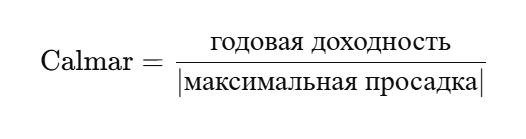

In [ ]:
def calmar_ratio(ret_annual_geom, max_drawdown):
    return ret_annual_geom / abs(max_drawdown)

Показывает, насколько доходной была стратегия с учётом наибольшего риска. Чем выше Calmar, тем устойчивее актив: он либо зарабатывает больше, либо переживает меньшие просадки. Полезен для оценки долгосрочной стабильности — особенно если важно избегать сильных падений капитала.

# Skewness и Kurtosis

In [ ]:
from scipy.stats import skew as skew_fn, kurtosis as kurtosis_fn
def distribution_stats(ret_w):
    r = ret_w.dropna()
    return skew_fn(r), kurtosis_fn(r, fisher=True)


Асимметрия (Skewness) отражает перекос распределения доходностей: влево — чаще сильные падения, вправо — внезапные всплески. Эксцесс (Kurtosis) показывает частоту экстремальных отклонений. Эти метрики позволяют глубже понять «форму» доходностей: риски не всегда видны через среднее и стандартное отклонение.

# Stability Ratio

In [ ]:
def stability_ratio(ret_w):
    log_ret = np.log1p(ret_w.dropna())
    return log_ret.mean() / log_ret.std(ddof=1)

Показатель стабильности доходности: измеряет соотношение средней логарифмической доходности к её стандартному отклонению. Чем выше значение — тем равномернее и предсказуемее прибыль. Особенно полезен при анализе стратегий с регулярными, но умеренными доходами.

# CAGR (Compound Annual Growth Rate)

In [ ]:
def CAGR(ret_w):
    n_years = len(ret_w) / 52
    total_growth = (1 + ret_w.fillna(0)).prod()
    return total_growth**(1/n_years) - 1

Отражает среднегодовой темп прироста капитала, как если бы доходность оставалась постоянной на всём периоде. Это удобный способ сравнивать активы с разной длительностью данных и волатильностью — он «сглаживает» флуктуации и показывает итоговую эффективность стратегии.

# Подсчет всех метрик

In [ ]:
#Константы
RISK_FREE = 0.13     # Безрисковая ставка 13%

#Сегменты индексов
segment_map = {
    "RGBITR":    "облигации",
    "Gold":      "золото",
    "MCXSM":     "акции",
    "MCFTR":     "акции",
    "RUEYBCSTR": "облигации",
    "RGBI":      "облигации",
    "MRSV":      "акции",
    "MRBCTR":    "акции",
    "IMOEX":     "акции",
    "ESTIND": "недвижимость"
}

rows = []

for t, g in weekly.groupby("Ticker"):
    ret_geom, ret_simple = annual_returns_from_daily(g["ret_w"])
    vol = annual_vol_from_daily(g["ret_w"])

    sh = sharpe_ratio(ret_geom, vol, r_f=RISK_FREE)

    mdd = max_drawdown(g["ret_w"])


    seg = segment_map.get(t)

    rows.append({
        "Ticker": t,
        "segment": seg,

        "ret_annual_geom_%":   round(ret_geom * 100, 2),
        "ret_annual_simple_%": round(ret_simple * 100, 2),
        "vol_annual_%":        round(vol * 100, 2),
        "Sharpe":              round(sh, 2),
        "Max_Drawdown_%":      round(mdd * 100, 2),
    })

summary = pd.DataFrame(rows).sort_values("vol_annual_%")
summary_joined_full = final_df.merge(summary, on="Ticker", how="left")



In [ ]:
summary_joined_full = summary_joined_full.drop(columns=["value", "volume"])
summary_joined_full

,Ticker,open,close,high,low,begin,end,index_name,segment,ret_annual_geom_%,ret_annual_simple_%,vol_annual_%,Sharpe,Max_Drawdown_%
0,Gold,2329.7500,2329.7500,2329.7500,2329.7500,2015-11-03 00:00:00,2015-11-03,Gold,золото,16.84,18.67,25.20,0.15,-60.56
1,Gold,2321.6300,2321.6300,2321.6300,2321.6300,2015-11-04 00:00:00,2015-11-04,Gold,золото,16.84,18.67,25.20,0.15,-60.56
2,Gold,2257.0400,2257.0400,2257.0400,2257.0400,2015-11-06 00:00:00,2015-11-06,Gold,золото,16.84,18.67,25.20,0.15,-60.56
3,Gold,2267.9700,2267.9700,2267.9700,2267.9700,2015-11-07 00:00:00,2015-11-07,Gold,золото,16.84,18.67,25.20,0.15,-60.56
4,Gold,2277.6300,2277.6300,2277.6300,2277.6300,2015-11-10 00:00:00,2015-11-10,Gold,золото,16.84,18.67,25.20,0.15,-60.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20015,ESTIND,76.5422,76.5422,76.5422,76.5422,2025-02-01 00:00:00,2025-02-28,ESTIND,недвижимость,5.47,6.20,13.46,-0.56,-22.37
20016,ESTIND,76.5422,76.5422,76.5422,76.5422,2025-03-01 00:00:00,2025-03-31,ESTIND,недвижимость,5.47,6.20,13.46,-0.56,-22.37
20017,ESTIND,76.3457,76.3457,76.3457,76.3457,2025-04-01 00:00:00,2025-04-30,ESTIND,недвижимость,5.47,6.20,13.46,-0.56,-22.37
20018,ESTIND,76.3457,76.3457,76.3457,76.3457,2025-05-01 00:00:00,2025-05-31,ESTIND,недвижимость,5.47,6.20,13.46,-0.56,-22.37


# Переходим к анализу

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")


In [ ]:
final_with_seg = final_df.merge(
    summary[["Ticker", "segment"]],
    on="Ticker",
    how="left"
)

df_norm = final_with_seg.sort_values(["Ticker", "end"]).copy()

# нормируем цену закрытия к 1 в начале по каждому индексу
df_norm["close_norm"] = (
    df_norm
    .groupby("Ticker")["close"]
    .transform(lambda x: x / x.iloc[0])
)


Нормировка нужна, чтобы сравнить поведение разных активов, даже если они изначально стоили по-разному. Мы делим все значения цены на первую цену в ряду (то есть приравниваем старт к 1), и дальше уже видим, как каждый актив изменялся в процентах относительно своей начальной точки. Это позволяет честно сравнить динамику — кто вырос, кто упал, и насколько.

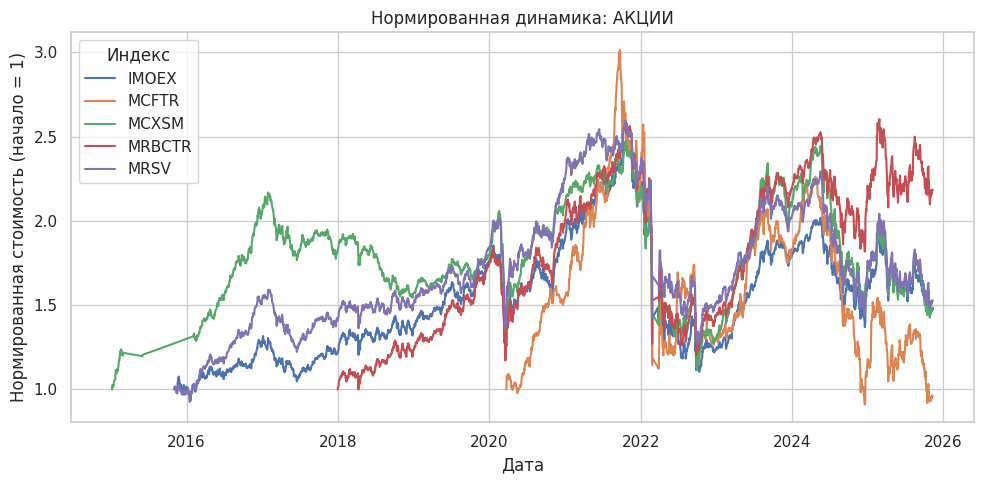

In [ ]:
plt.figure(figsize=(10, 5))
data_equity = df_norm[df_norm["segment"] == "акции"]

sns.lineplot(
    data=data_equity,
    x="end",
    y="close_norm",
    hue="Ticker"
)

plt.title("Нормированная динамика: АКЦИИ")
plt.xlabel("Дата")
plt.ylabel("Нормированная стоимость (начало = 1)")
plt.legend(title="Индекс")
plt.tight_layout()


Из графика видно, что динамика российских акций в целом отражает характер роста и падения фондового рынка за последние годы. Периоды подъёмов 2016–2019 годов сменяются резкими просадками в кризисные фазы — особенно заметен обвал 2022 года, после которого восстановление идёт неравномерно. Индексы IMOEX и MRBCTR ведут себя схоже, отражая движение широкого рынка, тогда как MCFTR показывает более высокую волатильность и сильнее реагирует на внешние шоки.

Однако важно заметить, что в долгосрочной перспективе акции являются высокодоходными активами

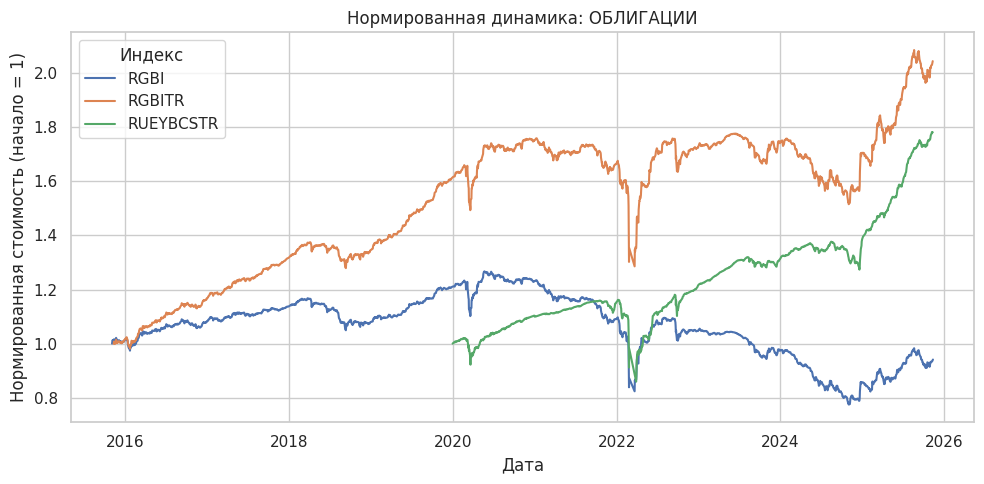

In [ ]:
plt.figure(figsize=(10, 5))
data_bonds = df_norm[df_norm["segment"] == "облигации"]

sns.lineplot(
    data=data_bonds,
    x="end",
    y="close_norm",
    hue="Ticker"
)

plt.title("Нормированная динамика: ОБЛИГАЦИИ")
plt.xlabel("Дата")
plt.ylabel("Нормированная стоимость (начало = 1)")
plt.legend(title="Индекс")
plt.tight_layout()


На графике показано, что облигационные индексы развиваются значительно стабильнее, чем акции, с более плавной траекторией изменения стоимости. Индекс RGBITR демонстрирует наиболее устойчивый рост, отражая совокупную доходность государственных облигаций, включая купонные выплаты. При этом RGBI и RUEYBCSTR сильнее реагируют на периоды повышения ключевой ставки и рост инфляционных ожиданий, что особенно заметно в 2022 году.

В целом облигации остаются инструментом с умеренным риском, обеспечивая более предсказуемую доходность и меньшую волатильность, чем акции.

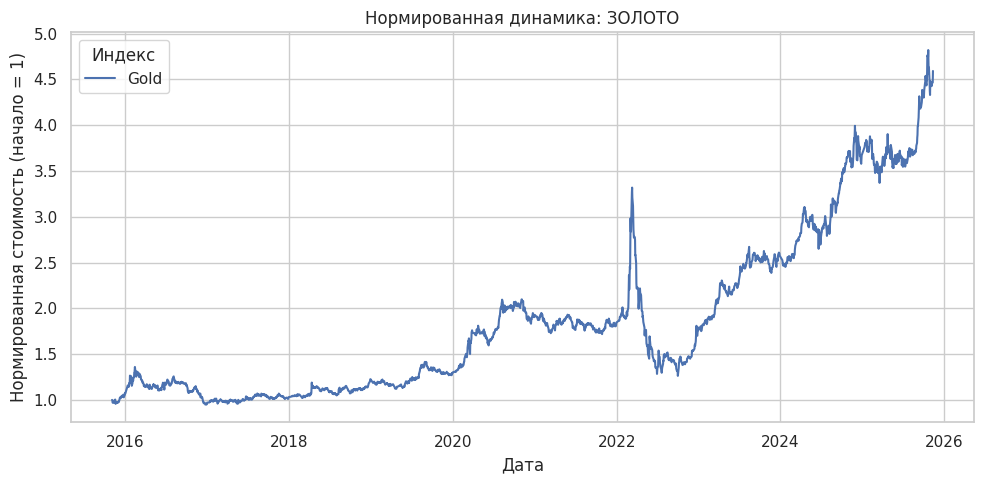

In [ ]:
plt.figure(figsize=(10, 5))
data_gold = df_norm[df_norm["segment"] == "золото"]

sns.lineplot(
    data=data_gold,
    x="end",
    y="close_norm",
    hue="Ticker"
)

plt.title("Нормированная динамика: ЗОЛОТО")
plt.xlabel("Дата")
plt.ylabel("Нормированная стоимость (начало = 1)")
plt.legend(title="Индекс")
plt.tight_layout()


Из графика видно, что золото растёт именно в периоды, когда акции и облигации теряют в стоимости. Это отражает типичное поведение инвесторов в кризисные годы — переход в защитные активы, которые сохраняют ценность даже при рыночных шоках. Рост стоимости золота в 2020 и 2022 годах совпадает с волатильностью на фондовом и долговом рынках, что подтверждает его роль как инструмента “убежища” в периоды неопределённости.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data_for_heatmap = weekly.pivot(index="end", columns="Ticker", values="ret_w")

data_for_heatmap = data_for_heatmap.dropna(how="any")

stocks = summary.loc[summary["segment"] == "акции", "Ticker"].tolist()
bonds = summary.loc[summary["segment"] == "облигации", "Ticker"].tolist()
gold = summary.loc[summary["segment"] == "золото", "Ticker"].tolist()


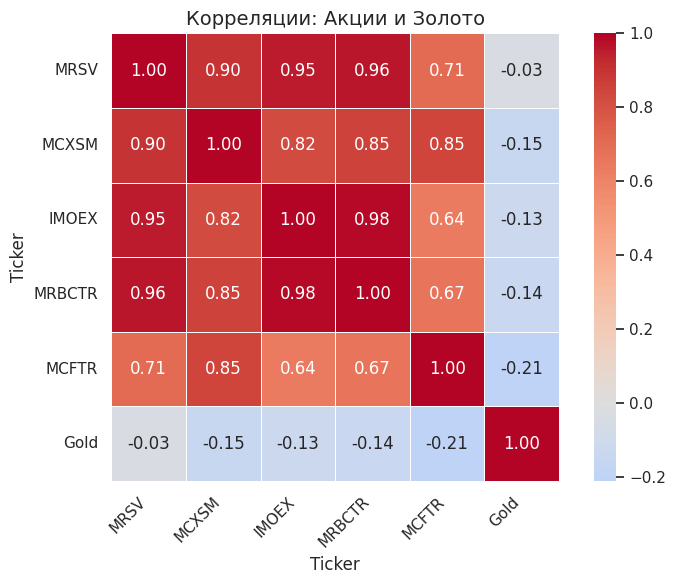

In [ ]:
tickers_stocks_gold = stocks + gold

corr_stocks_gold = data_for_heatmap[tickers_stocks_gold].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_stocks_gold,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    center=0
)
plt.title("Корреляции: Акции и Золото", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


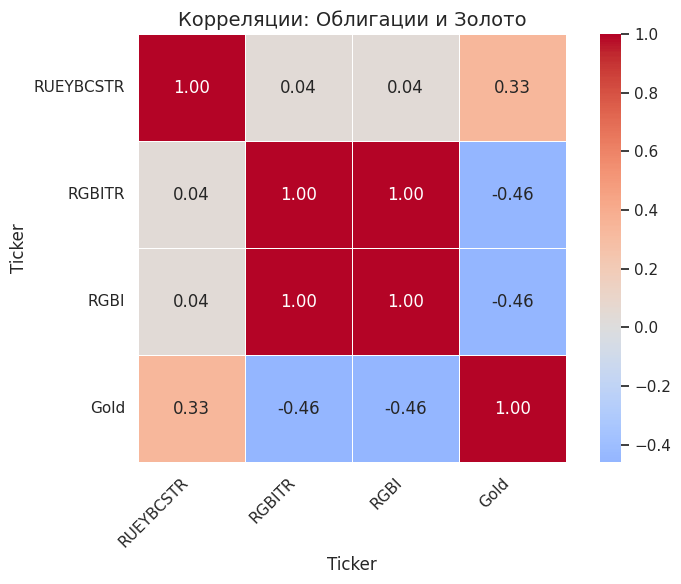

In [ ]:
tickers_bonds_gold = bonds + gold

corr_bonds_gold = data_for_heatmap[tickers_bonds_gold].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_bonds_gold,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    center=0
)
plt.title("Корреляции: Облигации и Золото", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Из двух хитмэпов видно, что золото движется в противофазе с основными классами активов — акциями и облигациями. Отрицательная корреляция подтверждает, что в периоды падения фондового рынка и роста волатильности золото чаще растёт в цене, выполняя функцию защитного инструмента. Поэтому его разумно включать в портфель в небольших количествах для хеджирования рисков в кризисные периоды. Однако важно учитывать, что золото не приносит добавочной стоимости и не генерирует доходность, сравнимую с акциями, поэтому его доля в портфеле должна быть сбалансирована в зависимости от уровня риск-толерантности инвестора.

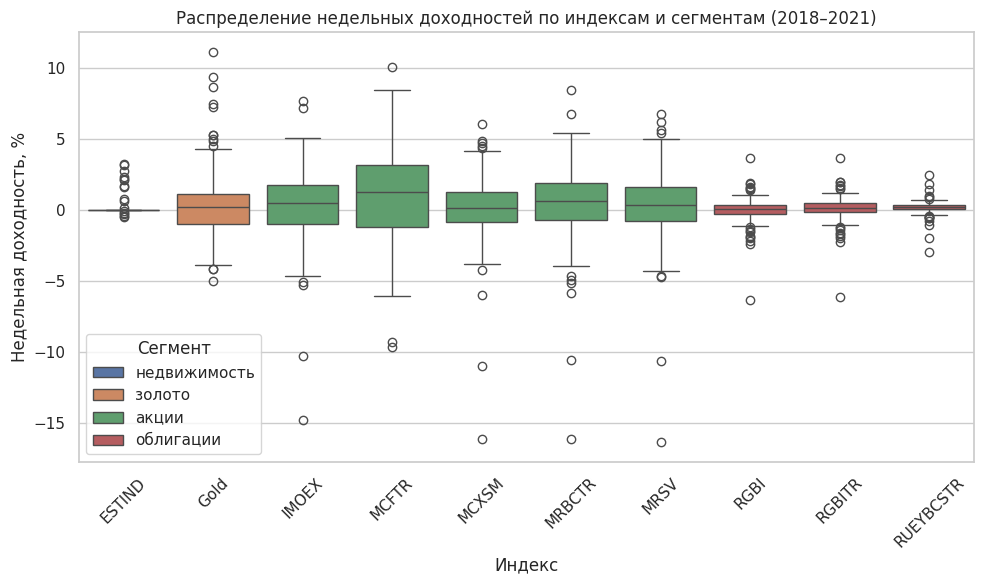

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

weekly_seg = weekly.merge(
    summary[["Ticker", "segment"]],
    on="Ticker",
    how="left"
).copy()

weekly_seg["end"] = pd.to_datetime(weekly_seg["end"])
weekly_seg["ret_w_pct"] = weekly_seg["ret_w"] * 100

weekly_18_21 = weekly_seg[weekly_seg["end"].between("2018-01-01", "2021-12-31")]

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=weekly_18_21,
    x="Ticker",
    y="ret_w_pct",
    hue="segment"
)

plt.title("Распределение недельных доходностей по индексам и сегментам (2018–2021)")
plt.xlabel("Индекс")
plt.ylabel("Недельная доходность, %")
plt.xticks(rotation=45)
plt.legend(title="Сегмент")
plt.tight_layout()
plt.show()


В период 2018–2021 годов акции демонстрировали заметно более широкий диапазон доходностей, что отражает их высокий уровень риска и подверженность рыночным колебаниям. Облигации в этот же период оставались стабильными — их разброс доходностей минимален, что делает их основой для консервативных портфелей. Золото показывало нейтральную, но устойчивую динамику с редкими всплесками — подтверждая роль защитного актива, не дающего высокой доходности, но снижающего общую волатильность портфеля.

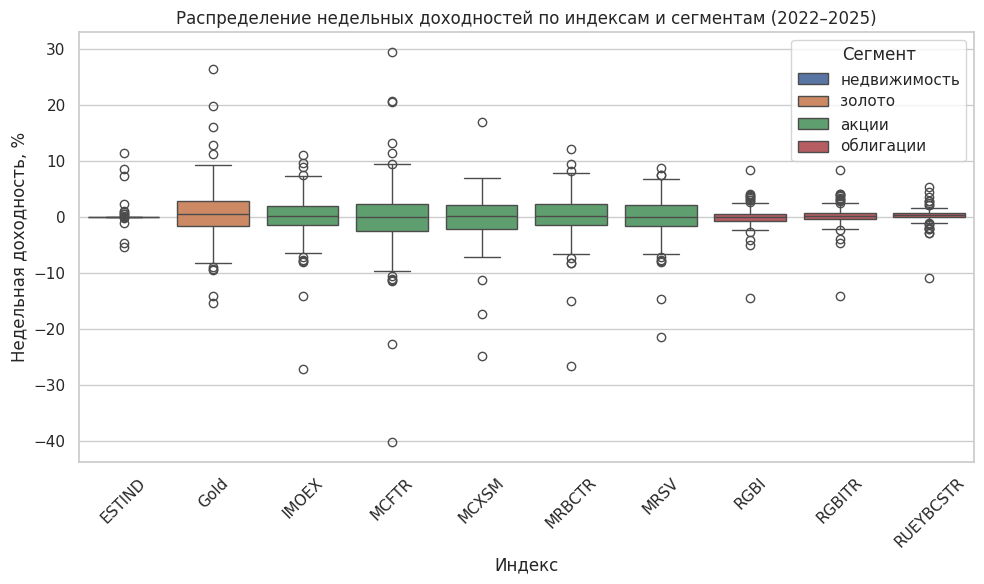

In [ ]:
weekly_22_25 = weekly_seg[weekly_seg["end"].between("2022-01-01", "2025-12-31")]

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=weekly_22_25,
    x="Ticker",
    y="ret_w_pct",
    hue="segment"
)

plt.title("Распределение недельных доходностей по индексам и сегментам (2022–2025)")
plt.xlabel("Индекс")
plt.ylabel("Недельная доходность, %")
plt.xticks(rotation=45)
plt.legend(title="Сегмент")
plt.tight_layout()
plt.show()


После 2022 года рынок стал значительно более волатильным: диапазон колебаний по акциям заметно расширился, появились экстремальные значения доходностей — как положительные, так и отрицательные. Это отражает повышенные рыночные риски, геополитическое давление и нестабильность рубля. Облигации сохранили относительную устойчивость, но их распределение стало менее “плотным”, что говорит о влиянии изменения процентных ставок и перезапуска долгового рынка. Золото в этот период подтверждает статус защитного актива — на фоне турбулентности фондового рынка именно оно демонстрирует наименьшую просадку и всплески роста в кризисные моменты.

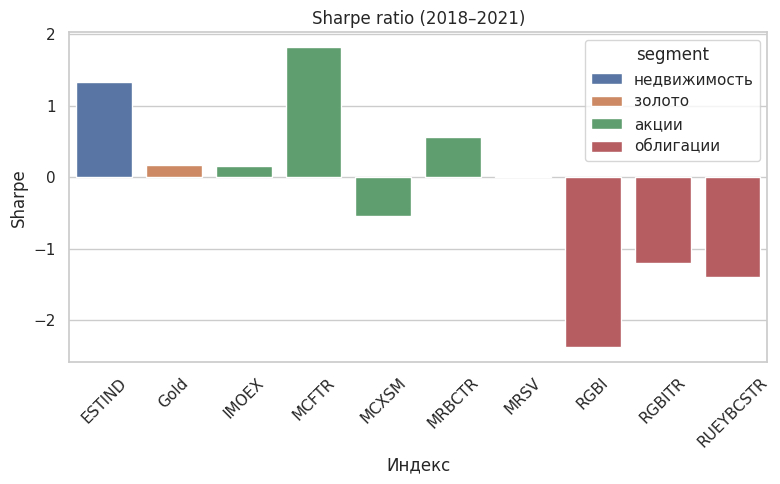

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

weekly_18_21 = weekly[weekly["end"].between("2018-01-01", "2021-12-31")].copy()

rows_sh_18_21 = []

for t, g in weekly_18_21.groupby("Ticker"):
    ret_geom, ret_simple = annual_returns_from_daily(g["ret_w"])
    vol = annual_vol_from_daily(g["ret_w"])
    sh = sharpe_ratio(ret_geom, vol, r_f=RISK_FREE)
    rows_sh_18_21.append({"Ticker": t, "Sharpe": sh})

sharpe_18_21 = pd.DataFrame(rows_sh_18_21)

if "segment" in summary.columns:
    sharpe_18_21 = sharpe_18_21.merge(
        summary[["Ticker", "segment"]],
        on="Ticker",
        how="left"
    )

plt.figure(figsize=(8, 5))
sns.barplot(
    data=sharpe_18_21,
    x="Ticker",
    y="Sharpe",
    hue="segment" if "segment" in sharpe_18_21.columns else None
)
plt.title("Sharpe ratio (2018–2021)")
plt.xlabel("Индекс")
plt.ylabel("Sharpe")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Sharpe ratio отражает эффективность актива — насколько доходность компенсирует риск, измеряемый волатильностью. Чем выше значение показателя, тем больше доходности получает инвестор за единицу риска. Поэтому цель — максимизировать Sharpe ratio: активы с более высоким коэффициентом считаются более “выгодными” по соотношению риск/доходность. В рассматриваемом периоде наибольшие значения Sharpe наблюдаются у фондов акций, особенно у индекса MCFTR, что указывает на высокую прибыльность при умеренном риске. Облигации и золото показывают меньшие значения — они обеспечивают стабильность, но приносят меньшую избыточную доходность.

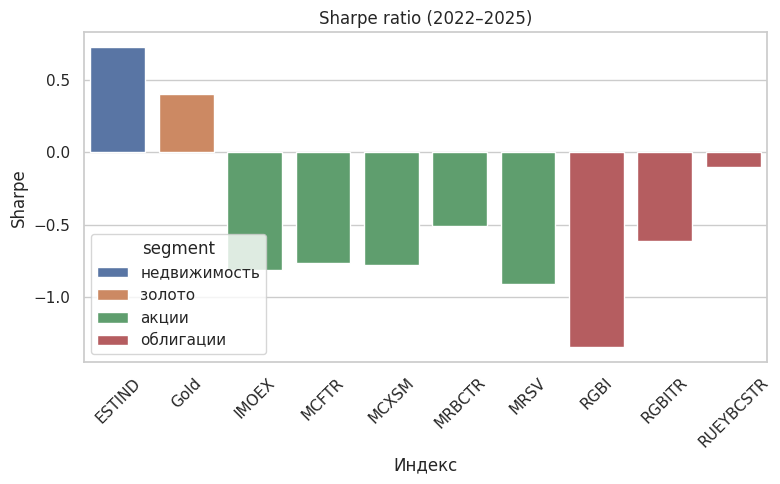

In [ ]:
weekly_22_25 = weekly[weekly["end"].between("2022-01-01", "2025-12-31")].copy()

rows_sh_22_25 = []

for t, g in weekly_22_25.groupby("Ticker"):
    ret_geom, ret_simple = annual_returns_from_daily(g["ret_w"])
    vol = annual_vol_from_daily(g["ret_w"])
    sh = sharpe_ratio(ret_geom, vol, r_f=RISK_FREE)
    rows_sh_22_25.append({"Ticker": t, "Sharpe": sh})

sharpe_22_25 = pd.DataFrame(rows_sh_22_25)

if "segment" in summary.columns:
    sharpe_22_25 = sharpe_22_25.merge(
        summary[["Ticker", "segment"]],
        on="Ticker",
        how="left"
    )

plt.figure(figsize=(8, 5))
sns.barplot(
    data=sharpe_22_25,
    x="Ticker",
    y="Sharpe",
    hue="segment" if "segment" in sharpe_22_25.columns else None
)
plt.title("Sharpe ratio (2022–2025)")
plt.xlabel("Индекс")
plt.ylabel("Sharpe")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Резкое падение значений Sharpe ratio в 2022–2025 годах отражает изменение рыночных условий и рост неопределённости. После геополитического шока 2022 года волатильность на российском рынке существенно возросла, а средние доходности по акциям снизились. Это привело к ухудшению соотношения “доходность/риск” и, как следствие, отрицательным или околонулевым значениям Sharpe для большинства фондов акций. Облигации сохранили умеренные положительные показатели за счёт стабилизации процентных ставок, а золото стало одним из немногих активов с высоким Sharpe ratio, выступив в роли защитного инструмента.

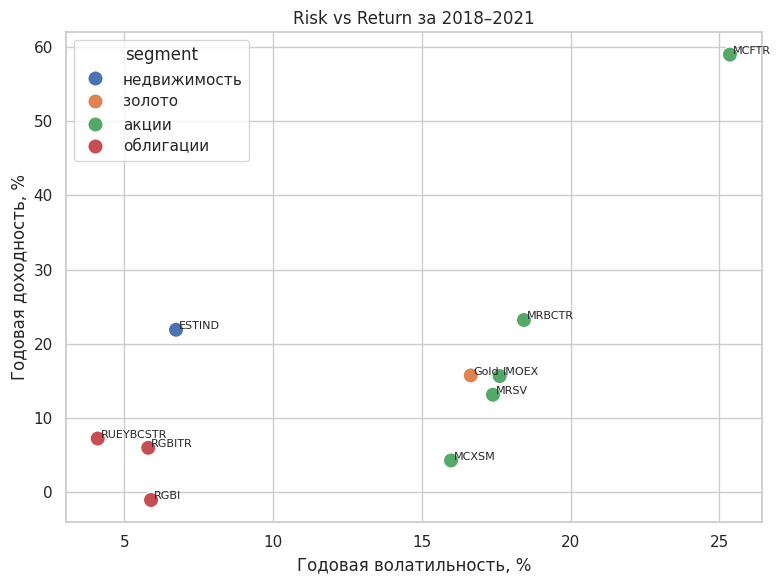

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

weekly_18_21 = weekly[weekly["end"].between("2018-01-01", "2021-12-31")].copy()

rows_18_21 = []

for t, g in weekly_18_21.groupby("Ticker"):
    ret_geom, ret_simple = annual_returns_from_daily(g["ret_w"])
    vol = annual_vol_from_daily(g["ret_w"])
    rows_18_21.append({
        "Ticker": t,
        "ret_annual_geom_%": ret_geom * 100,
        "vol_annual_%": vol * 100,
    })

summary_18_21 = pd.DataFrame(rows_18_21)

if "segment" in summary.columns:
    summary_18_21 = summary_18_21.merge(
        summary[["Ticker", "segment"]],
        on="Ticker",
        how="left"
    )

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=summary_18_21,
    x="vol_annual_%",
    y="ret_annual_geom_%",
    hue="segment" if "segment" in summary_18_21.columns else None,
    s=120
)

plt.title("Risk vs Return за 2018–2021")
plt.xlabel("Годовая волатильность, %")
plt.ylabel("Годовая доходность, %")

for _, row in summary_18_21.iterrows():
    plt.text(
        row["vol_annual_%"] + 0.1,
        row["ret_annual_geom_%"] + 0.1,
        row["Ticker"],
        fontsize=8
    )

plt.tight_layout()
plt.show()


График наглядно демонстрирует классическую зависимость между риском и доходностью. Акции в этот период показывали высокую доходность при относительно высокой волатильности, что делает их подходящими для инвесторов с агрессивным профилем. Наиболее заметным лидером по доходности стал индекс MCFTR, что указывает на сильное восстановление и рост фондового рынка в докризисные годы. Облигации, напротив, характеризуются низкой волатильностью и умеренной доходностью, что делает их предпочтительным инструментом для консервативных стратегий. Золото занимает промежуточное положение — при меньшем риске обеспечивает стабильную положительную доходность и служит эффективным элементом диверсификации портфеля.

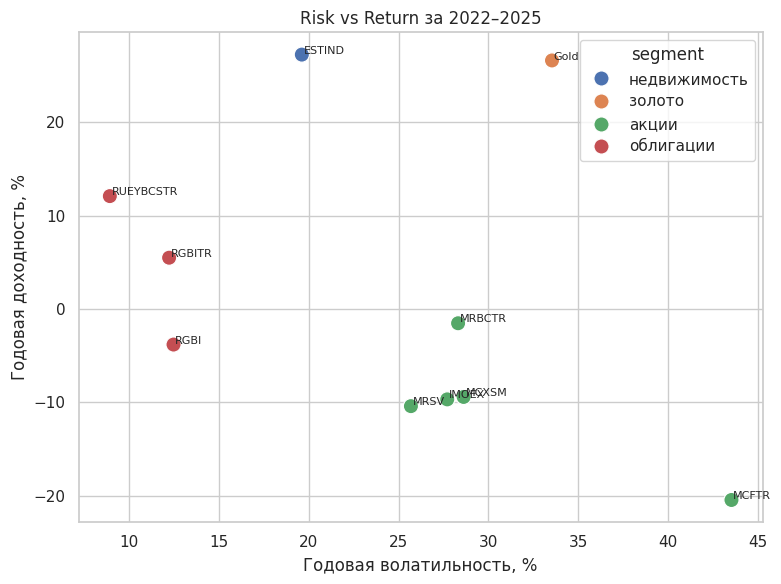

In [ ]:
weekly_22_25 = weekly[weekly["end"].between("2022-01-01", "2025-12-31")].copy()

rows_22_25 = []

for t, g in weekly_22_25.groupby("Ticker"):
    ret_geom, ret_simple = annual_returns_from_daily(g["ret_w"])
    vol = annual_vol_from_daily(g["ret_w"])
    rows_22_25.append({
        "Ticker": t,
        "ret_annual_geom_%": ret_geom * 100,
        "vol_annual_%": vol * 100,
    })

summary_22_25 = pd.DataFrame(rows_22_25)

if "segment" in summary.columns:
    summary_22_25 = summary_22_25.merge(
        summary[["Ticker", "segment"]],
        on="Ticker",
        how="left"
    )

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=summary_22_25,
    x="vol_annual_%",
    y="ret_annual_geom_%",
    hue="segment" if "segment" in summary_22_25.columns else None,
    s=120
)

plt.title("Risk vs Return за 2022–2025")
plt.xlabel("Годовая волатильность, %")
plt.ylabel("Годовая доходность, %")

for _, row in summary_22_25.iterrows():
    plt.text(
        row["vol_annual_%"] + 0.1,
        row["ret_annual_geom_%"] + 0.1,
        row["Ticker"],
        fontsize=8
    )

plt.tight_layout()
plt.show()


После 2022 года соотношение риск/доходность резко изменилось: волатильность всех классов активов значительно выросла, а доходности акций оказались отрицательными. Это отражает последствия рыночного шока, санкций и снижения ликвидности. На фоне общей нестабильности золото стало единственным активом с выраженной положительной доходностью при умеренном уровне риска, подтвердив статус “защитного убежища”. Облигации частично восстановились — особенно RUEYBCSTR, показав умеренный рост при низкой волатильности, — что делает их привлекательными для консервативных инвесторов. В целом график демонстрирует смещение фокуса с агрессивных стратегий к более сбалансированным и защитным инструментам.

**Недвижимость на фоне других классов активов**
<br>
Добавление недвижимости в анализ позволяет расширить оценку инвестиционных возможностей. В докризисный период 2018–2021 года данный класс активов демонстрировал относительно невысокую доходность при умеренной волатильности. Это соответствует его традиционному восприятию как консервативного инструмента, часто применяемого для долгосрочного сохранения капитала, а не для его агрессивного роста.

Однако в 2022–2025 годах, на фоне повышенной экономической и геополитической нестабильности, сегмент недвижимости резко прибавил в доходности. Это может быть связано с рядом факторов: от перетока капитала из фондового рынка в "осязаемые" активы, до высокой инфляции, которая подогревает спрос на реальные активы. При этом волатильность осталась на приемлемом уровне, что может говорить не столько о рыночной переоценке, сколько об ограниченности ликвидности и инерционности цен в данном сегменте. В итоге недвижимость оказалась почти на уровне золота как антикризисный актив, показывая высокую доходность при сравнительно разумном уровне риска.

Таким образом, недвижимость — хотя и не обладает той ликвидностью и доступностью, как акции и облигации, — в условиях кризисов способна служить защитным элементом портфеля, особенно при долгосрочном горизонте.


# Выводы и рекомендации

Соотношение риска и доходности меняется в разные периоды: Поведение основных классов активов зависит от экономической ситуации – в благоприятные периоды рискованные инструменты приносят более высокую доходность, тогда как в кризисные времена лидируют защитные активы.

Отдельные категории показывают себя по-разному: акции обычно растут во время экономического подъёма, облигации обеспечивают стабильность при снижении процентных ставок, а золото особенно выручает в периоды высокой инфляции или финансовых потрясений.

То, что максимально эффективно в спокойные годы (например, акции), может значительно просесть в кризис, и наоборот – защитные активы приносят наибольшую пользу именно во время спадов, снижая общий риск портфеля.

Долгосрочный рост активов снижает риски: Исторически на длительной дистанции финансовые рынки имеют восходящий тренд, поэтому увеличение горизонта инвестирования заметно уменьшает вероятность долгосрочных убытков. Со временем акции и другие активы обычно восстанавливаются после просадок и продолжают рост, обгоняя инфляцию. К примеру, классический портфель 60/40 (60% акций и 40% облигаций) за ~20 лет существенно превысил уровень инфляции (на +11% и более) – даже серьёзные кризисы 2008 и 2022 годов не помешали ему быстро вернуться к прежним значениям.

Длинный горизонт даёт возможность пересидеть временные падения рынка и дождаться нового роста, благодаря чему риски снижаются с увеличением срока инвестиций.

Движение активов в противофазе (хеджирование рисков): Включение в портфель разных типов активов позволяет компенсировать просадку одних инструментов ростом других. Диверсификация работает благодаря низкой корреляции между категориями: ни один из традиционных активов не движется строго в унисон с остальными (например, в российской выборке ни одна пара активов не имела корреляции выше ~0,6, а большинство – значительно ниже). Это означает, что падение цен по одному классу (скажем, акциям) не обязательно сопровождается падением других. Например, во времена биржевых кризисов золото нередко дорожает, сокращая убытки портфеля, а государственные облигации могут расти в цене на фоне бегства инвесторов в защитные активы. Таким образом, комбинируя акции, облигации и золото, инвестор сглаживает колебания стоимости своего портфеля и повышает вероятность сохранить капитал при шоковых событиях на рынке.

Диверсификация портфеля и регулярная ребалансировка: Широкое распределение средств между разными активами делает доходность портфеля более стабильной. Практика показывает, что волатильность значительно снижается за счёт диверсификации, позволяя постепенно накапливать капитал без чрезмерных просадок. Важным инструментом является периодическая ребалансировка – возвращение долей активов к целевому соотношению. Этот процесс автоматически приводит к продаже части подорожавших активов и докупке просевших, реализуя принцип «продать дорого, купить дёшево». Поддержание баланса таким образом помогает зафиксировать прибыль и вложить средства в отставшие сегменты, что повышает совокупную доходность в долгосроке. Однако ребалансировать портфель следует с разумной периодичностью: слишком редкие пересмотры приводят к сильным перекосам структуры, а слишком частые – увеличивают издержки и могут снижать доходность. Оптимальной считается частота корректировки раз в квартал или полгода(слишком частые операции не нужны). При таком подходе диверсифицированный портфель со временем растёт более ровно и предсказуемо, а риск отдельных неудачных инвестиций нивелируется.

Горизонт инвестиций и толерантность к риску: Структура портфеля должна учитывать срок, на который инвестор планирует вложения, и его личную склонность к риску. Чем больше времени до финансовой цели, тем большую долю можно вложить в акции, ведь даже при серьёзной просадке рынков будет время для восстановления цен.

Соответственно, для длительного горизонта (10–15+ лет) допустима высокая доля акций (вплоть до преимущественно акционного портфеля), тогда как при краткосрочных целях (до ~3 лет) основной упор делают на облигации, которые более предсказуемы и могут погаситься в ближайшие годы. По мере приближения срока цели инвестиционный горизонт сокращается, поэтому долю рисковых активов разумно уменьшать, переводя капитал в более стабильные инструменты (надежные облигации, банковские депозиты) для сохранности накопленного.

Кроме того, важно трезво оценить свою психологическую готовность к рыночным колебаниям. Если инвестор терпимо относится к временным падениям цен ради возможности получить высокую прибыль, он может позволить себе повысить долю акций и высокодоходных (более волатильных) облигаций. Но если даже умеренная просадка вызывает дискомфорт, стоит ограничить долю рисковых активов в пользу облигаций и золота, чтобы портфель не превратился в источник стресса.

Примеры портфелей для разных типов инвесторов

В зависимости от инвестиционного горизонта и склонности к риску оптимальное соотношение акций, облигаций и золота будет различаться. Ниже приведены несколько типичных примеров портфелей, соответствующих различным профилям инвесторов:

Консервативный инвестор (горизонт ~1–3 года; низкий риск): Такой вкладчик ставит целью сохранить капитал и избежать значительных просадок на коротком промежутке. Портфель может состоять примерно из 10% акций, 80% облигаций и 10% золота. Основная доля вложена в надёжные облигации (например, государственные ОФЗ или высокорейтинговые корпоративные бумаги с близким погашением) – это обеспечивает стабильность. Небольшая часть акций (порядка 10%, предпочтительно через индексные фонды на широкий рынок или акции крупных «голубых фишек») добавляется для умеренного роста, а золото (около 10%, через ETF или банковский металл-счёт) служит хеджем от кризисов и инфляции.

Консервативный инвестор (горизонт ~10 лет; низкий риск): Несмотря на длительный срок инвестиций, низкая толерантность к риску диктует осторожную стратегию с упором на сохранность. Примерный состав такого портфеля – 30% акции, 60% облигации, 10% золото. Доля акций здесь чуть выше, чем у краткосрочного консерватора, что позволяет участвовать в долгосрочном росте рынков (используя диверсифицированные фондовые индексы или акции стабильных компаний). Одновременно около 60% капитала размещено в надёжных облигациях (гособлигации и качественные корпоративные), которые сгладят волатильность и обеспечат фиксированный доход. Присутствие ~10% золота добавляет портфелю защиту на случай экономических потрясений, дополняя диверсификацию.

Сбалансированный инвестор (горизонт 5–7 лет; умеренный риск): Стремится к балансу между доходностью и стабильностью. Типовой портфель может включать 50% акций, 40% облигаций и 10% золота. Около половины активов в акциях (например, фонды на мировые рынки или сочетание различных отраслей) обеспечивает хороший потенциал роста капитала. Значительная доля облигаций (~40%) придаёт устойчивость – за счёт процентного дохода и меньших колебаний цен этих бумаг. Примесь золота (около 10%) выполняет роль дополнительного буфера на случай рыночной турбулентности. Такой портфель относительно сбалансирован: он способен приносить более высокую доходность, чем чисто облигационный, но при этом его просадки умеренны по сравнению с чисто акционным.

Агрессивный инвестор (горизонт >10 лет; высокий риск): Ориентируется на максимальный рост капитала в длительной перспективе и готов терпеть значительные колебания стоимости инвестиций. Для него портфель с преобладанием акций – обычное дело, например: 80% акции, 10% облигации, 10% золото. Высокая доля акций (вплоть до 80% и более, через глобальные фонды акций или подбор акций роста) предоставляет наибольший потенциальный доход за долгие годы. Н

Небольшая часть облигаций (~10%) может добавляться для минимальной подушки безопасности и генерации купонного дохода, хотя многие агрессивные инвесторы вовсе отказываются от облигаций. Присутствие золота (~10%) страхует портфель от экстремальных ситуаций – например, резкого скачка инфляции или очередного кризиса – без существенного ухудшения общей доходности. Такой портфель наиболее волатилен, однако при долгом горизонте времени у инвестора есть возможность переждать возможные падения рынка и получить высокую совокупную прибыль.

Спекулятивный инвестор (горизонт <1 года; очень высокий риск): Стремится к быстрой и высокой прибыли, осознавая и принимая опасность крупных потерь. В сверхагрессивном краткосрочном портфеле доля акций может достигать 90–100%, тогда как облигации, как правило, почти отсутствуют (0–10%). Возможна небольшая доля золота (скажем, ~10%) для страховки, однако такой инвестор часто полагается преимущественно на рост акций (или даже более волатильных активов) в краткий срок. Подобный подход фактически граничит с трейдингом и несёт очень высокие риски: успех зависит от благоприятной рыночной конъюнктуры в ближайшее время, а вероятность убытков велика. Такой портфель может дать наибольшую доходность в случае удачи, но он совершенно не защищён от неблагоприятного сценария, поэтому подходит лишь для тех, кто готов поставить капитал на игру с высокими ставками.